# Title here

## Business understanding


In [23]:
# Import necessary modules for data understanding
import pandas as pd
import numpy as np

In [24]:
# Load the datasets
data1 =pd.read_csv('Data/Train_predictors.csv')
data2 =pd.read_csv('Data/Train_labels.csv')
Test_data =pd.read_csv('Data/Test_predictors.csv')

# Merge data1 and data2 using the id as the refrence variable
Train_data_labels = pd.merge(data2,data1,how='left')


In [25]:
Train_data_labels

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [26]:
# Check info about the data
Train_data_labels.select_dtypes(include='object').info()
Train_data_labels.select_dtypes(include='number').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   status_group           59400 non-null  object
 1   date_recorded          59400 non-null  object
 2   funder                 55765 non-null  object
 3   installer              55745 non-null  object
 4   wpt_name               59400 non-null  object
 5   basin                  59400 non-null  object
 6   subvillage             59029 non-null  object
 7   region                 59400 non-null  object
 8   lga                    59400 non-null  object
 9   ward                   59400 non-null  object
 10  public_meeting         56066 non-null  object
 11  recorded_by            59400 non-null  object
 12  scheme_management      55523 non-null  object
 13  scheme_name            31234 non-null  object
 14  permit                 56344 non-null  object
 15  extraction_type    

In [27]:
# Investigate the response variable
Train_data_labels.status_group.value_counts()


functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

class imbalance present in the response variable 

In [28]:
# subset functional needs repair from the dataset
Train_data_labels=Train_data_labels.loc[Train_data_labels['status_group'] !='functional needs repair'].copy()

## Data Cleaning
- Check for duplicates
- Remove missing values 
- Drop irrelevant columns
- Check for outliers and handling them in the data



In [29]:
# Check for missing values
missing_val =Train_data_labels.isna().sum()
missing_val[missing_val>0]

funder                3198
installer             3215
subvillage             370
public_meeting        3178
scheme_management     3654
scheme_name          26162
permit                2756
dtype: int64

Most of the columns with missing values are objects. For columns with more than 20% missing values we will drop otherwise replace with value `mising`.

In [30]:
# Check for duplicates
Train_data_labels.duplicated().sum()


0

The Tanzania water pumps dataset does not contain missing data

In [31]:
Train_data_labels.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [32]:
# Drop Columns 
columns_drop = ['id','scheme_name','funder','num_private','subvillage','lga','ward','recorded_by','scheme_name',
                'construction_year','extraction_type','extraction_type_group','management','payment_type','quality_group',
                'quantity_group','source', 'source_type','waterpoint_type']

new_data = Train_data_labels.drop(columns=columns_drop).copy()


For the purpose of interpretability of the model and following the principle of pharsimony. I chose to drop the above columns based on the following reasons:
* Columns that had been repeated but with different column names
* Categorical variable that had many distinct values in our data
* Columns with higher number of rows with missing values 

In [33]:
# Performing data imputation to replace missing values
missing_val =new_data.isna().sum()
missing_val[missing_val>0]


installer            3215
public_meeting       3178
scheme_management    3654
permit               2756
dtype: int64

In [34]:
new_data.fillna("missing_val").isna().sum()

status_group             0
amount_tsh               0
date_recorded            0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
basin                    0
region                   0
region_code              0
district_code            0
population               0
public_meeting           0
scheme_management        0
permit                   0
extraction_type_class    0
management_group         0
payment                  0
water_quality            0
quantity                 0
source_class             0
waterpoint_type_group    0
dtype: int64

In [35]:
# ....Investigate outliers
new_data.select_dtypes(include='number').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55083 entries, 0 to 59399
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   amount_tsh     55083 non-null  float64
 1   gps_height     55083 non-null  int64  
 2   longitude      55083 non-null  float64
 3   latitude       55083 non-null  float64
 4   region_code    55083 non-null  int64  
 5   district_code  55083 non-null  int64  
 6   population     55083 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 3.4 MB


## Exploratory Data Analysis


For this section we will try and be one with the data🙏🏿.By experimenting different statistical tests and techniques we aim to get a deeper understanding of the data as well as insights that we will use for modelling. To do so let's summon the greatest explorer of our time...


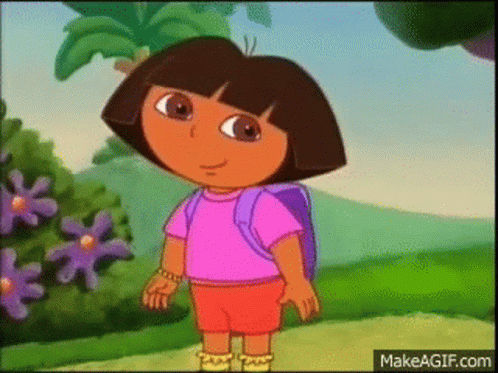





- Normalize/Standardize the data
- Validate data accuracy (Making sure our data aligns with real-world scenario)


In [36]:
# Import helper functions to help visualize our data
from functions import plot_category,plot_category